In [27]:
import json
import pickle
import re
import os
import shutil

from sklearn.model_selection import train_test_split

In [31]:
img_files = os.listdir("./data/OCH/ochuman/")

In [38]:
random_state = 1
train, test = train_test_split(img_files, test_size=0.2, random_state=random_state)
val, test = train_test_split(test, test_size=0.5, random_state=random_state)

In [37]:
os.makedirs("./data/OCH/train_test_val/train", exist_ok=True)
os.makedirs("./data/OCH/train_test_val/test", exist_ok=True)
os.makedirs("./data/OCH/train_test_val/val", exist_ok=True)

In [36]:
for img in train:
    shutil.copy2(f"data/OCH/ochuman/{img}", f"data/OCH/train_test_val/train/{img}")

for img in val:
    shutil.copy2(f"data/OCH/ochuman/{img}", f"data/OCH/train_test_val/val/{img}")

for img in test:
    shutil.copy2(f"data/OCH/ochuman/{img}", f"data/OCH/train_test_val/test/{img}")

In [3]:
import pickle
import io
import torch

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

#contents = pickle.load(f) becomes...
with open(os.getcwd() + '/losses/candy/content_losses_dict.pickle', 'rb') as f:
    content_dict = CPU_Unpickler(f).load()


In [4]:
res = [i.item() for i in content_dict.values()]
res

[6.967254638671875,
 5.360657691955566,
 4.718585014343262,
 4.418315887451172,
 4.128648281097412,
 3.916006565093994,
 3.7825305461883545,
 3.6313655376434326,
 3.476025104522705,
 3.3547470569610596,
 7.081640243530273,
 4.203747749328613,
 3.7276320457458496,
 3.4804935455322266,
 3.3361895084381104,
 3.514822244644165,
 3.2063302993774414,
 3.1382040977478027,
 8.586904525756836,
 6.618242263793945,
 5.0084757804870605,
 4.392973899841309,
 4.102658748626709,
 3.7902090549468994,
 3.654798746109009,
 3.535252094268799,
 3.435163974761963,
 3.406813144683838,
 3.360835552215576,
 3.2544121742248535,
 3.19342041015625,
 3.1900057792663574,
 3.1316885948181152,
 3.0828609466552734,
 3.0407118797302246,
 3.03064227104187,
 3.001314163208008,
 2.9719691276550293,
 2.956878423690796,
 2.934512138366699,
 2.92307186126709,
 2.8761649131774902,
 2.875990152359009,
 2.882596969604492,
 2.844606399536133,
 2.8193531036376953,
 2.7921106815338135,
 2.9722228050231934,
 2.8587005138397217,
 2

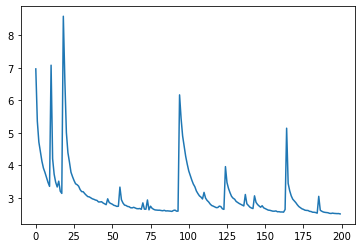

In [5]:
import matplotlib.pyplot as plt
plt.plot(res)
plt.show()

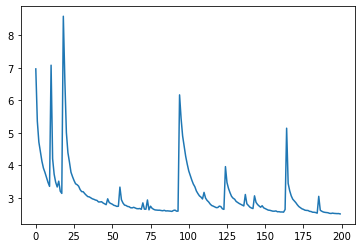

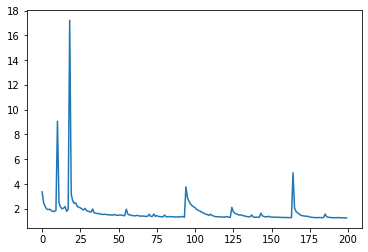

In [7]:
with open(os.getcwd() + '/losses/candy/content_losses_dict.pickle', 'rb') as f:
    content_dict = CPU_Unpickler(f).load()

res_content = [i.item() for i in content_dict.values()]
plt.plot(res_content)
plt.show()

with open(os.getcwd() + '/losses/candy/style_losses_dict.pickle', 'rb') as f:
    style_dict = CPU_Unpickler(f).load()

res_style = [i.item() for i in style_dict.values()]
plt.plot(res_style)
plt.show()

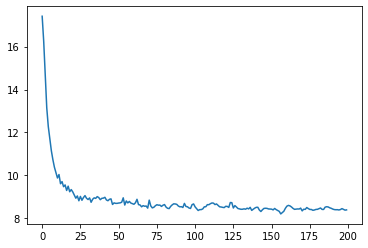

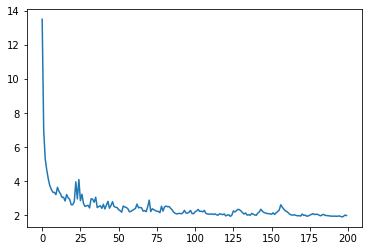

In [8]:
with open(os.getcwd() + '/losses/mosaic/content_losses_dict.pickle', 'rb') as f:
    content_dict = CPU_Unpickler(f).load()

res_content = [i.item() for i in content_dict.values()]
plt.plot(res_content)
plt.show()

with open(os.getcwd() + '/losses/mosaic/style_losses_dict.pickle', 'rb') as f:
    style_dict = CPU_Unpickler(f).load()

res_style = [i.item() for i in style_dict.values()]
plt.plot(res_style)
plt.show()

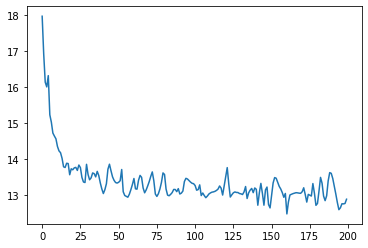

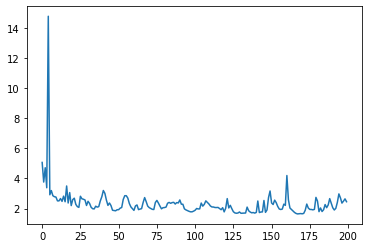

In [9]:
with open(os.getcwd() + '/losses/vg_starry_night/content_losses_dict.pickle', 'rb') as f:
    content_dict = CPU_Unpickler(f).load()

res_content = [i.item() for i in content_dict.values()]
plt.plot(res_content)
plt.show()

with open(os.getcwd() + '/losses/vg_starry_night/style_losses_dict.pickle', 'rb') as f:
    style_dict = CPU_Unpickler(f).load()

res_style = [i.item() for i in style_dict.values()]
plt.plot(res_style)
plt.show()

In [26]:
mask_loss_dict = {'loss_classifier':[], 'loss_box_reg':[], 'loss_mask':[], 'loss_objectness':[], 'loss_rpn_box_reg':[]}

In [27]:
for i in range(1, 101):
    with open(os.getcwd() + f'/losses/loss/{i}.pkl', 'rb') as f:
        mask_loss = CPU_Unpickler(f).load()

    mask_loss_dict['loss_classifier'].append(mask_loss['loss_classifier'])
    mask_loss_dict['loss_box_reg'].append(mask_loss['loss_box_reg'])
    mask_loss_dict['loss_mask'].append(mask_loss['loss_mask'])
    mask_loss_dict['loss_objectness'].append(mask_loss['loss_objectness'])
    mask_loss_dict['loss_rpn_box_reg'].append(mask_loss['loss_rpn_box_reg'])

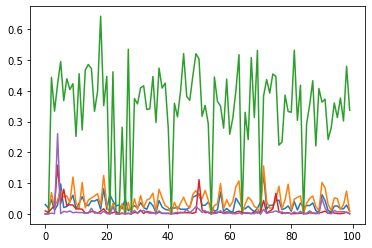

In [28]:
plt.plot(mask_loss_dict['loss_classifier'])
plt.plot(mask_loss_dict['loss_box_reg'])
plt.plot(mask_loss_dict['loss_mask'])
plt.plot(mask_loss_dict['loss_objectness'])
plt.plot(mask_loss_dict['loss_rpn_box_reg'])
plt.show()

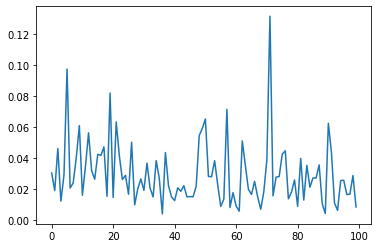

In [30]:
plt.plot(mask_loss_dict['loss_classifier'])
plt.show()

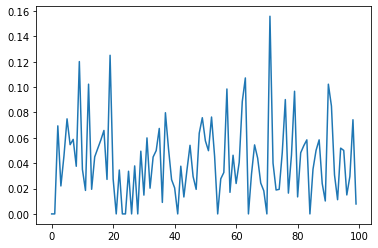

In [31]:
plt.plot(mask_loss_dict['loss_box_reg'])
plt.show()

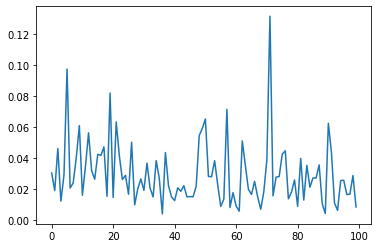

In [32]:
plt.plot(mask_loss_dict['loss_classifier'])
plt.show()

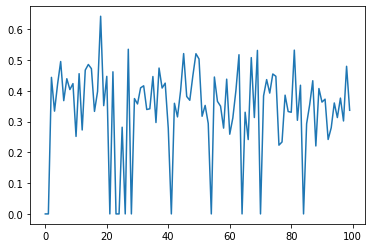

In [33]:
plt.plot(mask_loss_dict['loss_mask'])
plt.show()

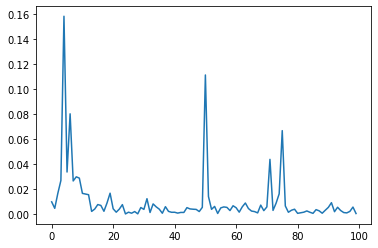

In [34]:
plt.plot(mask_loss_dict['loss_objectness'])
plt.show()

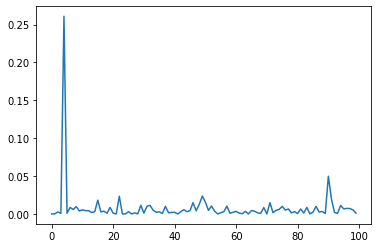

In [37]:
plt.plot(mask_loss_dict['loss_rpn_box_reg'])
plt.show()

In [ ]:
from scipy.stats import expon

#generate random values from exponential distribution with rate=40 and sample size=10
temp = expon.rvs(scale=40, size=10)
temp_2 = mask_loss_dict['loss_classifier'] + temp
plt.plot(mask_loss_dict['loss_rpn_box_reg'])
plt.show()